## Explore metadata for a curated dataset

This notebook shows how to explore the metadata of your JSTOR and/or Portico dataset using Python. The following processes are described:

* Importing your dataset
* Discovering the size and contents of your dataset
* Turning your dataset into a pandas dataframe
* Visualizing the contents of your dataset as a graph with pandas

A familiarity with pandas is helpful but not required.
____
We import the [pandas](./key-terms.ipynb#pandas) module to help visualize and manipulate our data. Importing `as pd` allows us to call pandas' functions using the short phrase `pd` instead of typing out `pandas` each time. 

In [11]:
import pandas as pd

We import the `Dataset` module from the `tdm_client` library. The tdm_client library contains functions for connecting to the JSTOR server containing our [corpus](./key-terms.ipynb#corpus) [dataset](./key-terms.ipynb#dataset). To analyze your dataset, use the [dataset ID](./key-terms.ipynb/#dataset-ID) provided when you created your [dataset](./key-terms.ipynb/#dataset). A copy of your [dataset ID](./key-terms.ipynb/#dataset-ID) was sent to your email when you created your [corpus](./key-terms.ipynb#corpus). It should look like a long series of characters surrounded by dashes. 

In [12]:
from tdm_client import Dataset

We create a new variable **dset** and initialize its value using the **Dataset** function. A sample **dataset ID** featuring Shakespeare Quarterly (1950-2014) is provided here ('59c090b6-3851-3c65-e016-9181833b4a2c'). Pasting your unique **dataset ID** here will import your dataset from the JSTOR server.

**Note**: If you are curious what is in your dataset, there is a download link in the email you received. The format and content of the files is described in the notebook [Building a Dataset](./1-building-a-dataset.ipynb). 

In [13]:
dset = Dataset('59c090b6-3851-3c65-e016-9181833b4a2c')

Find total number of documents in the dataset using the `len()` function. 

In [14]:
len(dset)

1000

The dset variable now contains all the documents in our corpus. We can take a peak at our documents using in our dataset by taking a slice of the first five items.

In [32]:
dset.items[0:5]

['http://www.jstor.org/stable/i40075057',
 'http://www.jstor.org/stable/i40103856',
 'http://www.jstor.org/stable/i40075051',
 'http://www.jstor.org/stable/i40075048',
 'http://www.jstor.org/stable/i40075029']

We can also check if a particular item is in our list if we know the stable url using the `in` or `not in` operators. Let's check to see if volume 5.1 of the journal *Mosaic* is `in` the dataset by using its stable URL (https://www.jstor.org/stable/i24775424).

# 'http://www.jstor.org/stable/i40075051' in dset.items

The document metadata can be retrieved by calling the `get_metadata` method. The metadata is a list of Python dictionaries containing attributes for each document. We create a new list variable `metadata` by using the `get_metadata` method on dset. 

In [16]:
metadata = dset.get_metadata()

Print the contents of **metadata** for the first document in the dataset. The data is displayed as a dictionary of key/value pairs. 

In [17]:
print(metadata[0])

{'id': 'http://www.jstor.org/stable/i23675740', 'journalTitle': 'The Shakespeare Association Bulletin', 'pageCount': 29, 'provider': 'jstor', 'title': 'The Shakespeare Association Bulletin volume 3 issue 2', 'wordCount': 22502, 'yearPublished': 1928}


We can convert `metadata` to a Pandas dataframe to take advantage of its plotting and manipulation functions. This will help us learn more about what's in our metadata. We define this new dataframe as `df`.

In [18]:
df = pd.DataFrame(metadata)

Print the first 5 rows of the dataframe `df` with the `head` attribute.

In [19]:
df.head()

,id,journalTitle,pageCount,provider,title,wordCount,yearPublished
0,http://www.jstor.org/stable/i23675740,The Shakespeare Association Bulletin,29,jstor,The Shakespeare Association Bulletin volume 3 ...,22502.0,1928
1,http://www.jstor.org/stable/i247053,Asian Theatre Journal,41,jstor,Asian Theatre Journal volume 5 issue 1,17718.0,1988
2,http://www.jstor.org/stable/i23917916,Literature and Theology,105,jstor,Literature and Theology volume 12 issue 3,59158.0,1998
3,http://www.jstor.org/stable/i338524,Shakespeare Quarterly,198,jstor,Shakespeare Quarterly volume 29 issue 2,147913.0,1978
4,http://www.jstor.org/stable/i338476,Shakespeare Quarterly,71,jstor,Shakespeare Quarterly volume 17 issue 2,35733.0,1966


We can find the year range in our pandas dataframe by finding the minimum and maximum of `'yearPublished'`.

In [20]:
minYear = df['yearPublished'].min()
maxYear = df['yearPublished'].max()

print(str(minYear) + ' to ' + str(maxYear))

1902 to 2019


Now let's do some preliminary analysis. Let's say we want to plot the number of documents by decade in the sample set. 

Since `decade` isn't a value in our dataset, we need to add it to the dataframe. We can do this by defining a new dataframe column `decade`. To translate a year (1925) to a decade (1920), we need to subtract the final digit so it becomes a zero. We can find the value for the final digit in any particular case by using modulo (which provides the remainder of a division). Here's an example using the date 1925.

In [21]:
1925 - (1925 % 10)

1920

We can translate this example to the whole dataframe using the following code.

In [22]:
df['decade'] = df['yearPublished'] - ( df['yearPublished'] % 10)

To see the new decade column in our data, let's print the first 5 rows of the dataframe again.

In [24]:
df.head()

,id,journalTitle,pageCount,provider,title,wordCount,yearPublished,decade
0,http://www.jstor.org/stable/i23675740,The Shakespeare Association Bulletin,29,jstor,The Shakespeare Association Bulletin volume 3 ...,22502.0,1928,1920
1,http://www.jstor.org/stable/i247053,Asian Theatre Journal,41,jstor,Asian Theatre Journal volume 5 issue 1,17718.0,1988,1980
2,http://www.jstor.org/stable/i23917916,Literature and Theology,105,jstor,Literature and Theology volume 12 issue 3,59158.0,1998,1990
3,http://www.jstor.org/stable/i338524,Shakespeare Quarterly,198,jstor,Shakespeare Quarterly volume 29 issue 2,147913.0,1978,1970
4,http://www.jstor.org/stable/i338476,Shakespeare Quarterly,71,jstor,Shakespeare Quarterly volume 17 issue 2,35733.0,1966,1960


Now we can use the built in plotting tools of Pandas to plot the number of documents from each provider by decade.

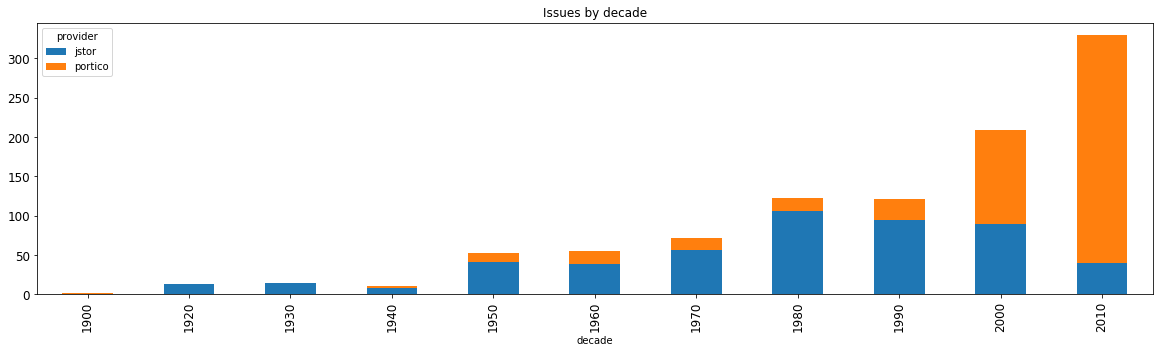

In [26]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Issues by decade', figsize=(20, 5), fontsize=12, stacked=True);

And do the same for the total number of pages.

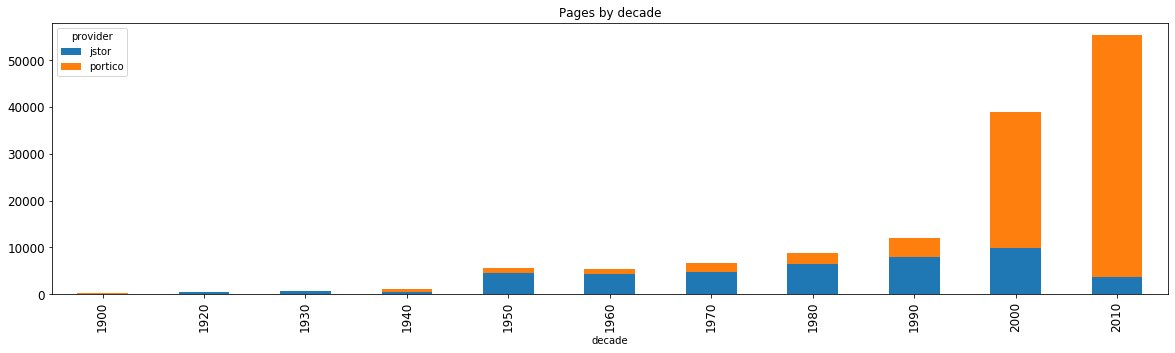

In [27]:
df.groupby(['decade', 'provider'])['pageCount'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);